# ANGOLO DI BREWSTER

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'brewster.csv'
fr = pd.read_csv(FILE)

In [5]:
V90 = np.array(fr['V90'])
sigmaV90 = np.array(fr['sigmaV90'])
teta90 = np.array(fr['teta90'])
sigmaθ = np.ones_like(teta90)

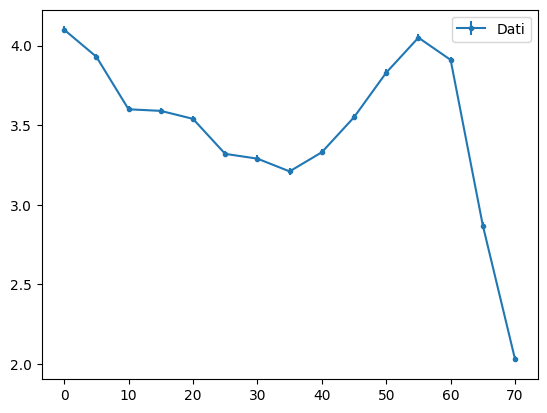

In [6]:
plt.errorbar(teta90, V90, yerr=sigmaV90, fmt='.-', label='Dati')
plt.legend()
plt.show()

TODO: raccogliere ulteriori misure dell'intorno dell'angolo di brewster, eventualmente ricavare il coeff di rifrazione del materiale, segnare il materiale, distanze, trovare coeff trasmissione e di riflessione

In [7]:
def parabola(x, a, b, θ):
    return a * (x - θ)**2 + b

a1, a2 = 9, 14
fit_angolo_bragg = Interpolazione(teta90[a1:a2], V90[a1:a2], sigmaV90[a1:a2], sigmaθ[a1:a2], parabola, [-0.1, 4, 55],names=['a', 'b', 'θ'],iteration=2)

print(fit_angolo_bragg)

----------------- VALORI FIT: -----------------
a: (-9.052 ± 1.324)e-3 
b: 4.06 ± 0.029 
θ: (5.423 ± 0.047)e1 

dof: 2
chi2: 5.84
chi2 ridotto: 2.92
pvalue: 0.05
------------------------------------------------



Angolo di brewster: 54.23 ± 0.47 deg


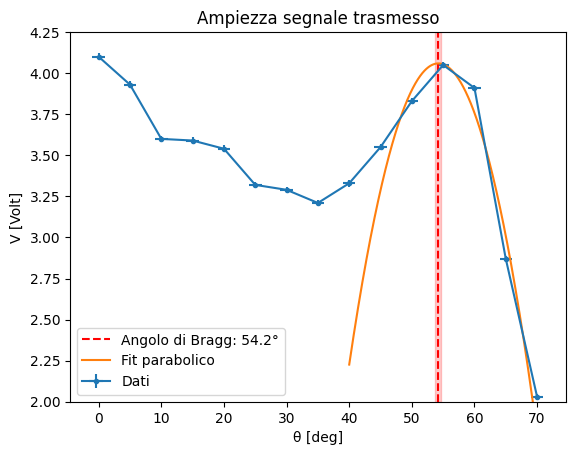

In [19]:
plt.errorbar(teta90, V90, yerr=sigmaV90,xerr=sigmaθ, fmt='.-', label='Dati')

plt.axvline(x=54.2, color='red', linestyle='--',label='Angolo di Bragg: 54.2°')
plt.fill_betweenx(np.linspace(2,4.25,100),54.2 - 0.47,54.2 + 0.47, color='red', alpha=0.2)

plt.xlabel('θ [deg]')
plt.ylabel('V [Volt]')
plt.title('Ampiezza segnale trasmesso')
plt.ylim(2,4.25)
x = np.linspace(teta90[a1-1], teta90[a2], 1000)
plt.plot(x, parabola(x, *list(fit_angolo_bragg.values.values())), label='Fit parabolico')
plt.legend()

print('Angolo di brewster:',final_val(fit_angolo_bragg.values['θ'],fit_angolo_bragg.errors['θ'],2,0,'deg'))

plt.show()